Accuracy : 1.0
[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]


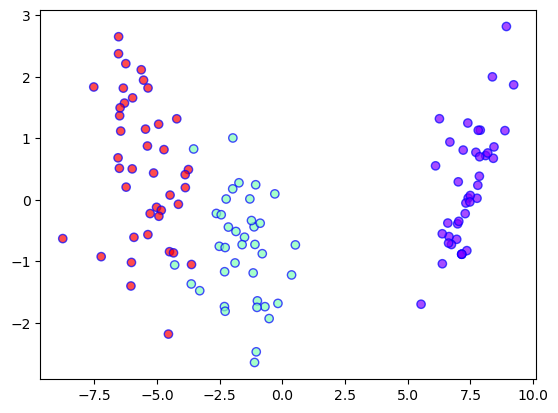

In [1]:
# necessary import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# read dataset from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
cls = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=cls)

# divide the dataset into class and target variable
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

# Preprocess the dataset and divide into train and test
sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# plot the scatterplot
plt.scatter(
	X_train[:,0],X_train[:,1],c=y_train,cmap='rainbow',
alpha=0.7,edgecolors='b'
)

# classify using random forest classifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)


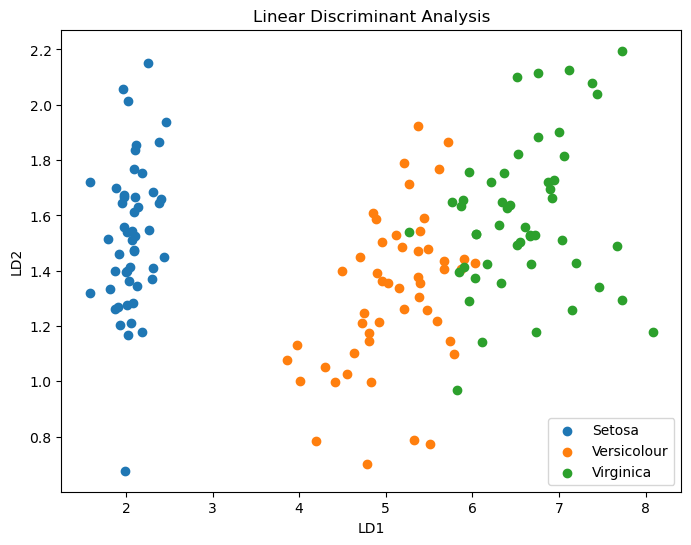

In [8]:
# based on https://github.com/eriklindernoren/ML-From-Scratch/blob/master/mlfromscratch/supervised_learning/multi_class_lda.py

from __future__ import annotations
from typing import Optional, Union
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

class LDA:
    def __init__(self, n_components: Optional[int] = None):
        self.n_components = n_components
        self.eigenvalues = None
        self.eigenvectors = None

    def fit(self, X, y):
        if self.n_components is None or self.n_components > X.shape[1]:
            n_components = X.shape[1]
        else:
            n_components = self.n_components
        
        n_features = np.shape(X)[1]
        labels = np.unique(y)
        
        # Within class scatter matrix
        S_W = np.zeros((n_features, n_features))
        for label in labels:
            _X = X[y == label]
            S_W += np.cov(_X.T)  # Transpose _X to ensure each row is a feature

        # Between class scatter matrix
        total_mean = np.mean(X, axis=0)
        S_B = np.zeros((n_features, n_features))
        for label in labels:
            _X = X[y == label]
            _mean = np.mean(_X, axis=0)
            S_B += len(_X) * np.outer((_mean - total_mean), (_mean - total_mean))
            
        # Determine SW^-1 * SB by calculating inverse of SW
        A = np.linalg.inv(S_W).dot(S_B)

        # Get eigenvalues and eigenvectors of SW^-1 * SB
        eigenvalues, eigenvectors = np.linalg.eigh(A)

        # Sort the eigenvalues and corresponding eigenvectors from largest
        # to smallest eigenvalue and select the first n_components
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
        
        self.eigenvalues = eigenvalues
        self.eigenvectors = eigenvectors
        
    def fit_transform(self, X: Union[list, np.ndarray]) -> np.ndarray:
        self.fit(X, y)  # Corrected to include y
        return self.transform(X)        
    
    def transform(self, X):
        return np.dot(X, self.eigenvectors)
    
    @property
    def explained_variance_ratio_(self) -> np.ndarray:
        return self.eigenvalues / np.sum(self.eigenvalues)

if __name__ == '__main__':
    np.random.seed(5)

    iris = datasets.load_iris()
    X = iris.data
    y = iris.target

    lda = LDA(n_components=2)  # Reduced to 2 components for 2D visualization
    X_lda = lda.fit_transform(X)  # Removed 'y'

    plt.figure(figsize=(8, 6))

    for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
        plt.scatter(X_lda[y == label, 0], X_lda[y == label, 1], label=name)

    plt.xlabel('LD1')
    plt.ylabel('LD2')
    plt.title('Linear Discriminant Analysis')
    plt.legend()
    plt.grid(False)  # Hide the gridlines
    plt.show()


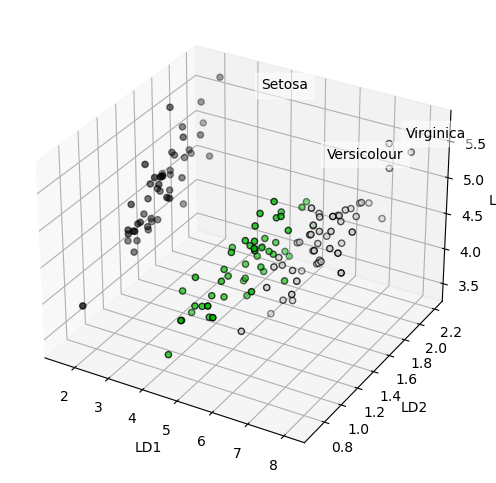

In [10]:
# based on https://github.com/eriklindernoren/ML-From-Scratch/blob/master/mlfromscratch/supervised_learning/multi_class_lda.py

from __future__ import annotations
from typing import Optional, Union
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

class LDA:
    def __init__(self, n_components: Optional[int] = None):
        self.n_components = n_components
        self.eigenvalues = None
        self.eigenvectors = None

    def fit(self, X, y):
        if self.n_components is None or self.n_components > X.shape[1]:
            n_components = X.shape[1]
        else:
            n_components = self.n_components
        
        n_features = np.shape(X)[1]
        labels = np.unique(y)
        
        # Within class scatter matrix
        S_W = np.zeros((n_features, n_features))
        for label in labels:
            _X = X[y == label]
            S_W += np.cov(_X.T)  # Transpose _X to ensure each row is a feature

        # Between class scatter matrix
        total_mean = np.mean(X, axis=0)
        S_B = np.zeros((n_features, n_features))
        for label in labels:
            _X = X[y == label]
            _mean = np.mean(_X, axis=0)
            S_B += len(_X) * np.outer((_mean - total_mean), (_mean - total_mean))
            
        # Determine SW^-1 * SB by calculating inverse of SW
        A = np.linalg.inv(S_W).dot(S_B)

        # Get eigenvalues and eigenvectors of SW^-1 * SB
        eigenvalues, eigenvectors = np.linalg.eigh(A)

        # Sort the eigenvalues and corresponding eigenvectors from largest
        # to smallest eigenvalue and select the first n_components
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
        
        self.eigenvalues = eigenvalues
        self.eigenvectors = eigenvectors
        
    def fit_transform(self, X: Union[list, np.ndarray]) -> np.ndarray:
        self.fit(X, y)  # Corrected to include y
        return self.transform(X)        
    
    def transform(self, X):
        return np.dot(X, self.eigenvectors)
    
    @property
    def explained_variance_ratio_(self) -> np.ndarray:
        return self.eigenvalues / np.sum(self.eigenvalues)

if __name__ == '__main__':
    np.random.seed(5)

    iris = datasets.load_iris()
    X = iris.data
    y = iris.target

    lda = LDA(n_components=3)
    X_lda = lda.fit_transform(X)  # Removed 'y'

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
        ax.text3D(X_lda[y == label, 0].mean(),
                  X_lda[y == label, 1].mean() + 1.5,
                  X_lda[y == label, 2].mean(), name,
                  horizontalalignment='center',
                  bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

    ax.scatter(X_lda[:, 0], X_lda[:, 1], X_lda[:, 2], c=y, cmap=plt.cm.nipy_spectral,
               edgecolor='k')

    ax.set_xlabel('LD1')
    ax.set_ylabel('LD2')
    ax.set_zlabel('LD3')

    plt.show()
